#Importing Packages

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Importing Dataset

In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download rohanrao/nifty50-stock-market-data

 76% 14.0M/18.4M [00:01<00:00, 22.4MB/s]
100% 18.4M/18.4M [00:01<00:00, 17.4MB/s]


In [ ]:
! unzip nifty50-stock-market-data.zip

Archive:  nifty50-stock-market-data.zip
  inflating: ADANIPORTS.csv          
  inflating: ASIANPAINT.csv          
  inflating: AXISBANK.csv            
  inflating: BAJAJ-AUTO.csv          
  inflating: BAJAJFINSV.csv          
  inflating: BAJFINANCE.csv          
  inflating: BHARTIARTL.csv          
  inflating: BPCL.csv                
  inflating: BRITANNIA.csv           
  inflating: CIPLA.csv               
  inflating: COALINDIA.csv           
  inflating: DRREDDY.csv             
  inflating: EICHERMOT.csv           
  inflating: GAIL.csv                
  inflating: GRASIM.csv              
  inflating: HCLTECH.csv             
  inflating: HDFC.csv                
  inflating: HDFCBANK.csv            
  inflating: HEROMOTOCO.csv          
  inflating: HINDALCO.csv            
  inflating: HINDUNILVR.csv          
  inflating: ICICIBANK.csv           
  inflating: INDUSINDBK.csv          
  inflating: INFRATEL.csv            
  inflating: INFY.csv                
  inflatin

In [ ]:
tata_motors = pd.read_csv('TATAMOTORS.csv')
tata_steel = pd.read_csv('TATASTEEL.csv')
tcs = pd.read_csv('TCS.csv')

# Viewing Dataset

In [ ]:
tata_motors.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,TELCO,EQ,201.60,207.4,217.25,207.4,217.0,216.75,214.28,676126,1.448775e+13,NaN,NaN,NaN
1,2000-01-04,TELCO,EQ,216.75,217.0,219.00,206.0,211.9,208.20,209.50,679215,1.422962e+13,NaN,NaN,NaN
2,2000-01-05,TELCO,EQ,208.20,194.0,217.80,194.0,213.1,213.25,210.33,1120951,2.357684e+13,NaN,NaN,NaN
3,2000-01-06,TELCO,EQ,213.25,215.0,229.90,215.0,222.0,222.10,225.29,1968998,4.435932e+13,NaN,NaN,NaN
4,2000-01-07,TELCO,EQ,222.10,224.0,239.90,223.1,239.9,239.90,236.32,2199431,5.197636e+13,NaN,NaN,NaN


In [ ]:
tata_steel.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,TISCO,EQ,142.35,148.00,153.2,146.10,152.50,152.45,150.92,2003185,3.023164e+13,NaN,NaN,NaN
1,2000-01-04,TISCO,EQ,152.45,150.10,153.0,143.05,151.95,150.80,151.03,1555136,2.348785e+13,NaN,NaN,NaN
2,2000-01-05,TISCO,EQ,150.80,144.60,162.9,144.60,158.00,156.55,156.85,3840284,6.023364e+13,NaN,NaN,NaN
3,2000-01-06,TISCO,EQ,156.55,158.95,169.1,158.95,169.00,168.25,167.61,2560449,4.291530e+13,NaN,NaN,NaN
4,2000-01-07,TISCO,EQ,168.25,173.40,179.0,166.30,170.55,171.95,173.89,3641691,6.332459e+13,NaN,NaN,NaN


In [ ]:
tcs.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,NaN,5206360,0.3042
1,2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,NaN,1294899,0.2561
2,2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,NaN,976527,0.2549
3,2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,NaN,701664,0.2294
4,2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14,NaN,695234,0.2624


In [ ]:
#all have some numbers of variables
print(" tata_motors dataset: ",tata_motors.shape)
print(" tata_steel dataset: ",tata_steel.shape)
print(" tcs dataset: ",tcs.shape)

 tata_motors dataset:  (5306, 15)
 tata_steel dataset:  (5306, 15)
 tcs dataset:  (4139, 15)


In [ ]:
print(" tata_motors dataset: ",tata_motors.info())
print(" tata_steel dataset: ",tata_steel.info())
print(" tcs dataset: ",tcs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4792 non-null   float64
 14  %Deliverble         4792 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

Date is in Object form so it should be corrected

In [ ]:
tata_motors['Date'] = pd.to_datetime(tata_motors['Date'])
tata_steel['Date'] = pd.to_datetime(tata_steel['Date'])
tcs['Date'] = pd.to_datetime(tcs['Date'])

In [ ]:
print(" tata_motors dataset: ",tata_motors.isnull().sum() / len(tata_motors) * 100)
print(" tata_steel dataset: ",tata_steel.isnull().sum() / len(tata_steel) * 100)
print(" tcs dataset: ",tcs.isnull().sum() / len(tcs) * 100)

 tata_motors dataset:  Date                   0.000000
Symbol                 0.000000
Series                 0.000000
Prev Close             0.000000
Open                   0.000000
High                   0.000000
Low                    0.000000
Last                   0.000000
Close                  0.000000
VWAP                   0.000000
Volume                 0.000000
Turnover               0.000000
Trades                53.712778
Deliverable Volume     9.687147
%Deliverble            9.687147
dtype: float64
 tata_steel dataset:  Date                   0.000000
Symbol                 0.000000
Series                 0.000000
Prev Close             0.000000
Open                   0.000000
High                   0.000000
Low                    0.000000
Last                   0.000000
Close                  0.000000
VWAP                   0.000000
Volume                 0.000000
Turnover               0.000000
Trades                53.712778
Deliverable Volume     9.687147
%Deliverble 

In [ ]:
# droping null values 
tata_motors = tata_motors.drop(['Trades','Deliverable Volume','%Deliverble'],axis=1)
tata_steel = tata_steel.drop(['Trades','Deliverable Volume','%Deliverble'],axis=1)
tcs = tcs.drop(['Trades','Deliverable Volume','%Deliverble'],axis=1)

In [ ]:
print(" tata_motors dataset: ",tata_motors.duplicated().sum())
print(" tata_steel dataset: ",tata_steel.duplicated().sum())
print(" tcs dataset: ",tcs.duplicated().sum())

 tata_motors dataset:  0
 tata_steel dataset:  0
 tcs dataset:  0


In [ ]:
print("Shape of tata_motors dataset: ",tata_motors.shape)
print("Shape of tata_steel dataset: ",tata_steel.shape)
print("Shape of tcs dataset: ",tcs.shape)

Shape of tata_motors dataset:  (5306, 12)
Shape of tata_steel dataset:  (5306, 12)
Shape of tcs dataset:  (4139, 12)


In [ ]:
print("Columns of tata_motors dataset: ",tata_motors.columns)
print("Columns of tata_steel dataset: ",tata_steel.columns)
print("Columns of tcs dataset: ",tcs.columns)

Columns of tata_motors dataset:  Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover'],
      dtype='object')
Columns of tata_steel dataset:  Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover'],
      dtype='object')
Columns of tcs dataset:  Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover'],
      dtype='object')


In [ ]:
tata_motors.describe().round(2)

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
count,5306.00,5306.00,5306.00,5306.00,5306.00,5306.00,5306.00,5.306000e+03,5.306000e+03
mean,409.43,410.15,417.12,402.18,409.45,409.45,409.76,1.046560e+07,2.790772e+14
std,272.48,272.97,277.02,268.03,272.52,272.47,272.49,2.185034e+07,4.674351e+14
min,58.80,58.00,60.70,57.55,58.75,58.80,59.24,1.235100e+04,1.069384e+11
25%,174.60,174.76,178.82,171.01,174.72,174.60,175.18,1.668994e+06,7.049025e+13
50%,377.25,378.90,384.75,372.60,377.52,377.25,378.46,4.141648e+06,1.967418e+14
75%,523.15,523.48,530.80,515.91,523.49,523.15,523.72,8.706037e+06,3.175959e+14
max,1365.15,1361.00,1382.00,1347.00,1362.00,1365.15,1362.15,3.905778e+08,9.365671e+15


In [ ]:
tata_steel.describe().round(2)

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
count,5306.00,5306.00,5306.00,5306.00,5306.00,5306.00,5306.00,5306.00,5.306000e+03
mean,403.39,404.25,411.21,396.51,403.47,403.55,404.06,6165253.31,2.664876e+14
std,187.15,187.56,190.79,183.86,187.27,187.31,187.44,5329084.46,3.012861e+14
min,67.25,66.00,69.70,66.00,67.30,67.25,67.97,23291.00,2.159165e+11
25%,275.77,275.60,284.41,270.00,275.81,275.94,276.94,2801379.50,1.118719e+14
50%,402.85,403.00,409.38,396.65,402.70,402.90,403.43,4800300.50,1.949303e+14
75%,523.99,525.00,534.72,516.49,523.95,524.08,525.23,7833888.00,3.379640e+14
max,1031.35,1024.00,1052.60,1011.10,1035.00,1034.00,1031.95,64284599.00,4.881124e+15


In [ ]:
tcs.describe().round(2)

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
count,4139.00,4139.00,4139.00,4139.00,4139.00,4139.00,4139.00,4139.00,4.139000e+03
mean,1693.84,1695.59,1715.88,1673.59,1694.31,1694.37,1694.62,1676761.95,2.952102e+14
std,722.88,722.98,728.45,717.78,723.18,723.06,723.14,1607879.26,3.849370e+14
min,366.65,360.00,377.75,358.00,365.70,366.65,368.40,18345.00,1.370237e+12
25%,1106.25,1105.53,1120.28,1088.58,1107.00,1106.50,1105.75,788477.50,1.050834e+14
50%,1633.50,1625.00,1655.00,1610.00,1630.05,1636.35,1629.42,1227748.00,1.824973e+14
75%,2326.12,2321.80,2345.00,2301.30,2325.00,2326.85,2319.90,2081119.50,3.455393e+14
max,3603.70,3625.00,3674.80,3572.55,3610.75,3603.70,3633.11,44033577.00,1.268362e+16


In [ ]:
tata_motors.head(2)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
0,2000-01-03,TELCO,EQ,201.60,207.4,217.25,207.4,217.0,216.75,214.28,676126,1.448775e+13
1,2000-01-04,TELCO,EQ,216.75,217.0,219.00,206.0,211.9,208.20,209.50,679215,1.422962e+13


In [ ]:
tata_motors['Month'] = tata_motors['Date'].dt.month
tata_motors['Year'] = tata_motors['Date'].dt.year
tata_motors['day'] = tata_motors['Date'].dt.day

In [ ]:
tata_steel['Month'] = tata_steel['Date'].dt.month
tata_steel['Year'] = tata_steel['Date'].dt.year
tata_steel['day'] = tata_steel['Date'].dt.day

In [ ]:
tcs['Month'] = tcs['Date'].dt.month
tcs['Year'] = tcs['Date'].dt.year
tcs['day'] = tcs['Date'].dt.day

# Comparing the Data

## On the basis of Price 

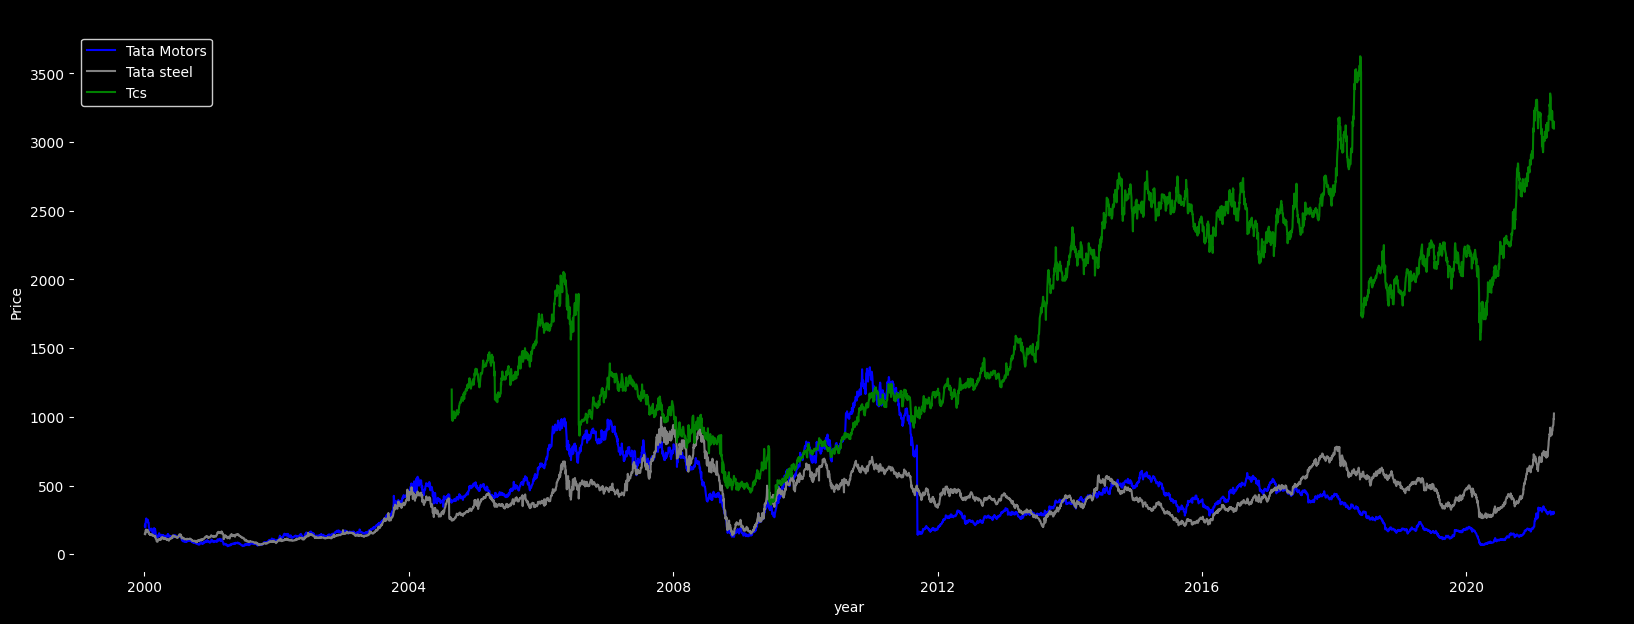

In [ ]:
# Create a Figure object with figsize and set facecolor to black
fig = plt.figure(figsize=(20,7), facecolor='black')
# Create a subplot with transparent facecolor
ax = fig.add_subplot(111, facecolor='none')
# Plot the data with specified colors
ax.plot(tata_motors['Date'],tata_motors['Open'],color='blue',label='Tata Motors')
ax.plot(tata_steel['Date'],tata_steel['Open'],color='grey',label='Tata steel')
ax.plot(tcs['Date'],tcs['Open'],color='green',label='Tcs')
# Set the title, x-axis label, and y-axis label
ax.set_title('Relation Between Tata Motors, Tata Steel, TCS Price Opeing')
ax.set_xlabel("year", color='white')
ax.set_ylabel("Price", color='white')
# Set the legend title color to white
ax.legend(title ="", facecolor='black', edgecolor='white', labelcolor='white')
# Set the tick colors to white
ax.tick_params(colors='white')
plt.show()

## On the basis of Volume 

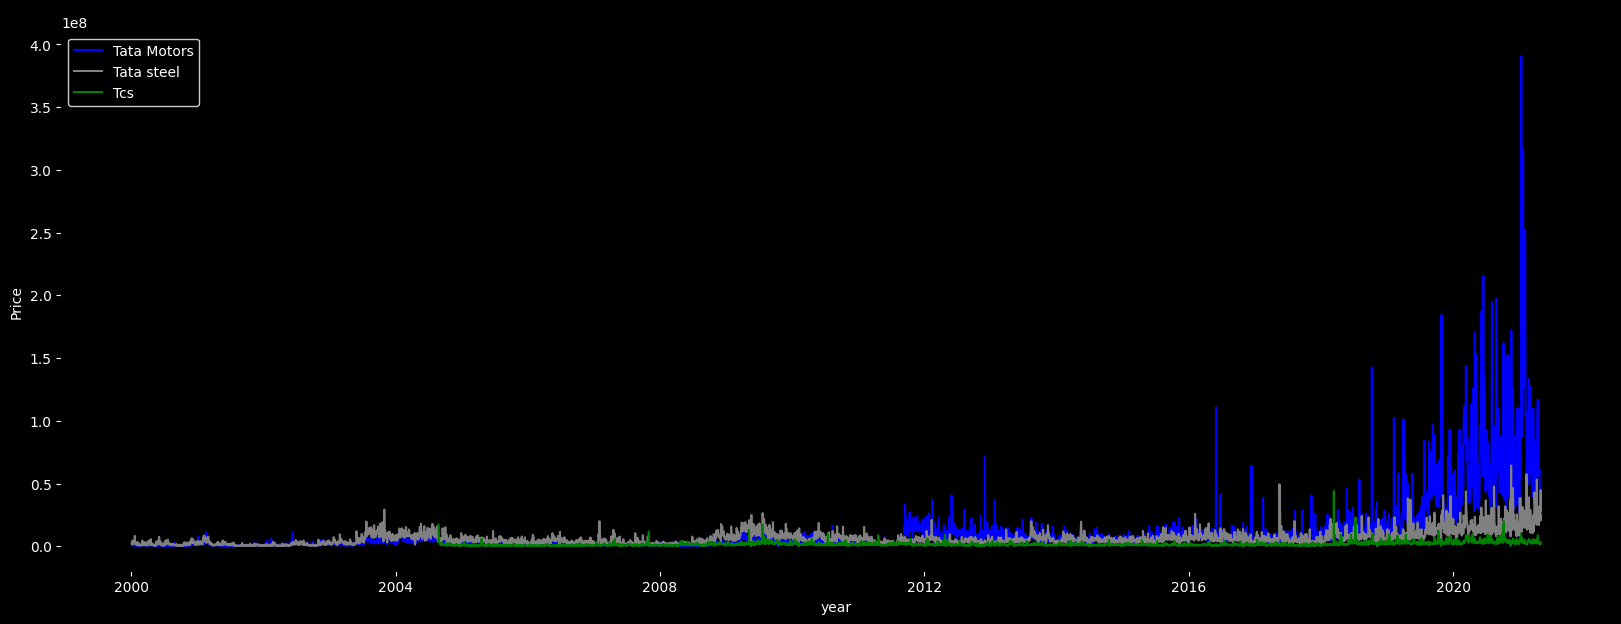

In [ ]:
# Create a Figure object with figsize and set facecolor to black
fig = plt.figure(figsize=(20,7), facecolor='black')
# Create a subplot with transparent facecolor
ax = fig.add_subplot(111, facecolor='none')
# Plot the data with specified colors
ax.plot(tata_motors['Date'],tata_motors['Volume'],color='blue',label='Tata Motors')
ax.plot(tata_steel['Date'],tata_steel['Volume'],color='grey',label='Tata steel')
ax.plot(tcs['Date'],tcs['Volume'],color='green',label='Tcs')
# Set the title, x-axis label, and y-axis label
ax.set_title('Relation Between Tata Motors, Tata Steel, TCS Volume Opeing')
ax.set_xlabel("year", color='white')
ax.set_ylabel("Price", color='white')
# Set the legend title color to white
ax.legend(title ="", facecolor='black', edgecolor='white', labelcolor='white')
# Set the tick colors to white
ax.tick_params(colors='white')
plt.show()



*   Though the price of TCS has risen more significantly as compared to Tat  Steel and Tata Motors, we can notice from the above graph that TCS has the least volume signifying that the python stock analysis has been traded comparatively less as compared to Tata Steel and Tata Motors and is lesser liquid.
*   Tata Motors on the other hand has been traded the most signifying higher liquidity, and better order execution.



# Return on Investment (ROI)

* In this part, we will analyze the ROI of Tata Steel, Tata Motors, and TCS if we buy one share of each stock on the 30th of each month beginning from January 2000 for Tata Motors and Tata Steel and November 2004 for TCS.

## Tata Motors ROI

In [ ]:
len(tata_motors)

5306

In [ ]:
tata_motors['Open'].tail()

5301    297.0
5302    295.7
5303    303.5
5304    308.9
5305    298.2
Name: Open, dtype: float64

In [ ]:
sumTM=0 #total amount invested in Tata Motors
s1=0 #number of shares owned by Tata Motors
#calcuating total amount invested and number of shares owned in Tata Motors

for i in range(len(tata_motors)):
    if tata_motors.loc[i,'day']==30:
        sumTM+=tata_motors.loc[i,'Open']
        s1+=1
#displaying basic results
print("Total Invested in Tata Motors = Rs",round(sumTM,2))
print("Shares Owned of Tata Motors =",s1)
print("Average Investmentment of 1 share = Rs",round((sumTM/s1),2))

tm_end=298.2 #last open price of Tata Motors on 2021-04-30
#obtained by looking at the data or can be seen after executing tata_motors.tail()
#calculating investment results
result1=round((tm_end*s1)-sumTM,2)
roiTM=round((result1/sumTM)*100,2)
#displaying investment results
print("Investment Result:")
if result1<0:
    print("Net Unrealised Loss = Rs",result1)
else:
    print("Net Unrealised Profit = Rs",result1)

print("Tata Motors ROI from 2000-1-3 to 2021-04-30 =",roiTM,"%")

Total Invested in Tata Motors = Rs 65977.3
Shares Owned of Tata Motors = 162
Average Investmentment of 1 share = Rs 407.27
Investment Result:
Net Unrealised Loss = Rs -17668.9
Tata Motors ROI from 2000-1-3 to 2021-04-30 = -26.78 %


## Tata Steel ROI

In [ ]:
tata_steel['Open'].tail()

5301     935.0
5302     948.3
5303     985.0
5304     983.0
5305    1024.0
Name: Open, dtype: float64

In [ ]:
sumTS=0 #total amount invested in Tata Motors
s2=0 #number of shares owned by Tata Motors
#calcuating total amount invested and number of shares owned in Tata Motors

for i in range(len(tata_steel)):
    if tata_steel.loc[i,'day']==30:
        sumTS+=tata_steel.loc[i,'Open']
        s2+=1
#displaying basic results
print("Total Invested in Tata steel = Rs",round(sumTS,2))
print("Shares Owned of Tata steel =",s2)
print("Average Investmentment of 1 share = Rs",round((sumTS/s2),2))

ts_end=1024.0 #last open price of Tata Motors on 2021-04-30
#obtained by looking at the data or can be seen after executing tata_motors.tail()
#calculating investment results

result2=round((ts_end*s2)-sumTS,2)
roiTS=round((result2/sumTS)*100,2)

#displaying investment results
print("Investment Result:")
if result2<0:
    print("Net Unrealised Loss = Rs",result2)
else:
    print("Net Unrealised Profit = Rs",result2)
    
print("Tata Steel ROI from 2000-1-3 to 2021-04-30 =",roiTS,"%")

Total Invested in Tata steel = Rs 65825.9
Shares Owned of Tata steel = 162
Average Investmentment of 1 share = Rs 406.33
Investment Result:
Net Unrealised Profit = Rs 100062.1
Tata Steel ROI from 2000-1-3 to 2021-04-30 = 152.01 %


## TCS ROI

In [ ]:
tcs['Open'].tail()

4134    3102.05
4135    3106.00
4136    3149.95
4137    3145.60
4138    3099.00
Name: Open, dtype: float64

In [ ]:
sumTCS=0 #total amount invested in Tata Motors
s3=0 #number of shares owned by Tata Motors
#calcuating total amount invested and number of shares owned in Tata Motors
for i in range(len(tcs)):
    if tcs.loc[i,'day']==30:
        sumTCS+=tcs.loc[i,'Open']
        s3+=1
#displaying basic results
print("Total Invested in TCS = Rs",round(sumTCS,2))
print("Shares Owned of TCS =",s3)
print("Average Investmentment of 1 share = Rs",round((sumTCS/s3),2))

tcs_end=3099.0 #last open price of Tata Motors on 2021-04-30
#obtained by looking at the data or can be seen after executing tata_motors.tail()

#calculating investment results
result3=round((tcs_end*s3)-sumTCS,2)
roiTcs=round((result3/sumTCS)*100,2)

#displaying investment results
print("Investment Result:")
if result3<0:
    print("Net Unrealised Loss = Rs",result3)
else:
    print("Net Unrealised Profit = Rs",result3)

print("TCS ROI from 2000-1-3 to 2021-04-30 =",roiTcs,"%")

Total Invested in TCS = Rs 220762.0
Shares Owned of TCS = 128
Average Investmentment of 1 share = Rs 1724.7
Investment Result:
Net Unrealised Profit = Rs 175910.0
TCS ROI from 2000-1-3 to 2021-04-30 = 79.68 %


From the above results, we can conclude that Tata Steel’s ROI is significantly larger than that of Tata Motors and TCS. TCS on the other hand, has made the greatest profit

## Ploting ROI on Bar Graphs

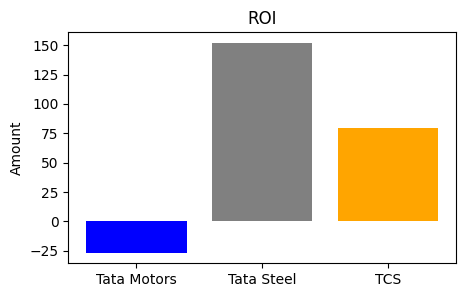

In [ ]:
# Plotting ROI Amount on Bar Graph

plt.figure(figsize=(5,3))
stock = ['Tata Motors','Tata Steel','TCS']
ROI = [roiTM, roiTS, roiTcs]
col = ['Blue','Grey','Orange']
plt.bar(stock,ROI,color=col)
plt.title("ROI")
plt.ylabel("Amount")
plt.show()

## Profit and Loss on Bar Graphs

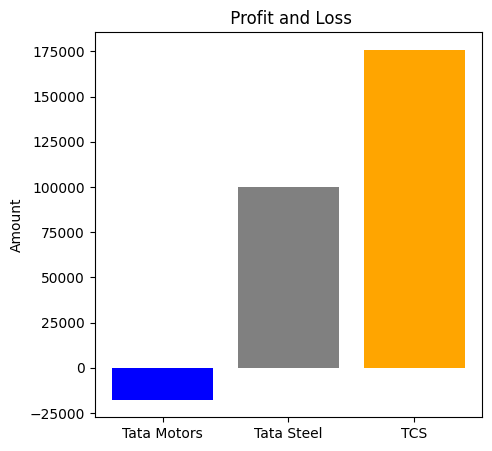

In [ ]:
# Plotting Profit/Loss Amount on Bar Graph

plt.figure(figsize=(5,5))
stock = ['Tata Motors','Tata Steel','TCS']
amt = [result1, result2, result3]
col = ['Blue','Grey','Orange']
plt.bar(stock,amt,color=col)
plt.title(" Profit and Loss")
plt.ylabel("Amount")
plt.show()

## Portfolio Allocation

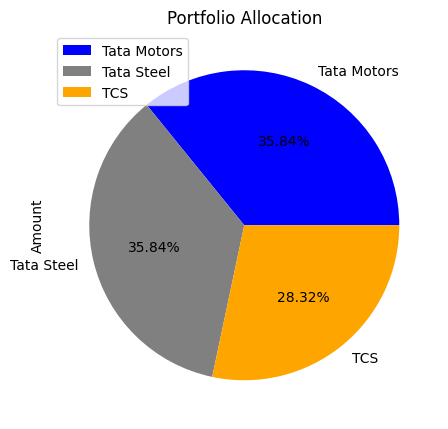

In [ ]:
# Plotting Portfolio Allocation on Pie chart

plt.figure(figsize=(5,6))
stock = ['Tata Motors','Tata Steel','TCS']
shares = [s1, s2, s3]
col = ['Blue','Grey','Orange']
plt.pie(shares,labels=stock,autopct="%1.2f%%",colors=col)
plt.legend(title="",loc="upper left")
plt.title("Portfolio Allocation")
plt.ylabel("Amount")
plt.show()

# Time Series Prediction

In [ ]:
# Load the data
df = pd.read_csv('TATAMOTORS.csv', index_col='Date')

# Create the features and target variables
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

In [ ]:
# Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

In [ ]:
# Split the data into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]

In [ ]:
# Build the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train.ravel())

RandomForestRegressor(random_state=42)

In [ ]:
# Predict the future price of Tata Motors stock
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Scale back the predictions to the original range
y_train_pred = scaler.inverse_transform(y_train_pred.reshape(-1, 1))
y_test_pred = scaler.inverse_transform(y_test_pred.reshape(-1, 1))

In [ ]:
# Calculate the mean squared error
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("Train MSE:", mse_train)
print("Test MSE:", mse_test)

Train MSE: 281449.14705954376
Test MSE: 82112.02542829828


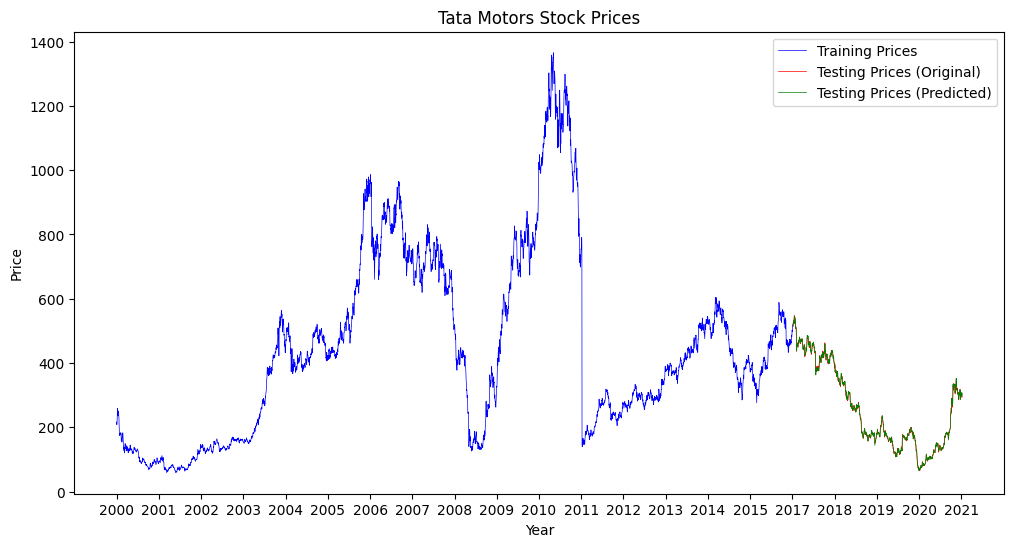

In [ ]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df.index[:train_size], y[:train_size], color='blue', linewidth=0.5, label='Training Prices')
plt.plot(df.index[train_size:], y[train_size:], color='red', linewidth=0.5, label='Testing Prices (Original)')
plt.plot(df.index[train_size:], y_test_pred, color='green', linewidth=0.5, label='Testing Prices (Predicted)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Tata Motors Stock Prices')
plt.legend()
plt.xticks(np.arange(len(df))[::len(df)//20], [str(year)[:4] for year in df.index[::len(df)//20]])
plt.show()